Note: you may need to restart the kernel to use updated packages.


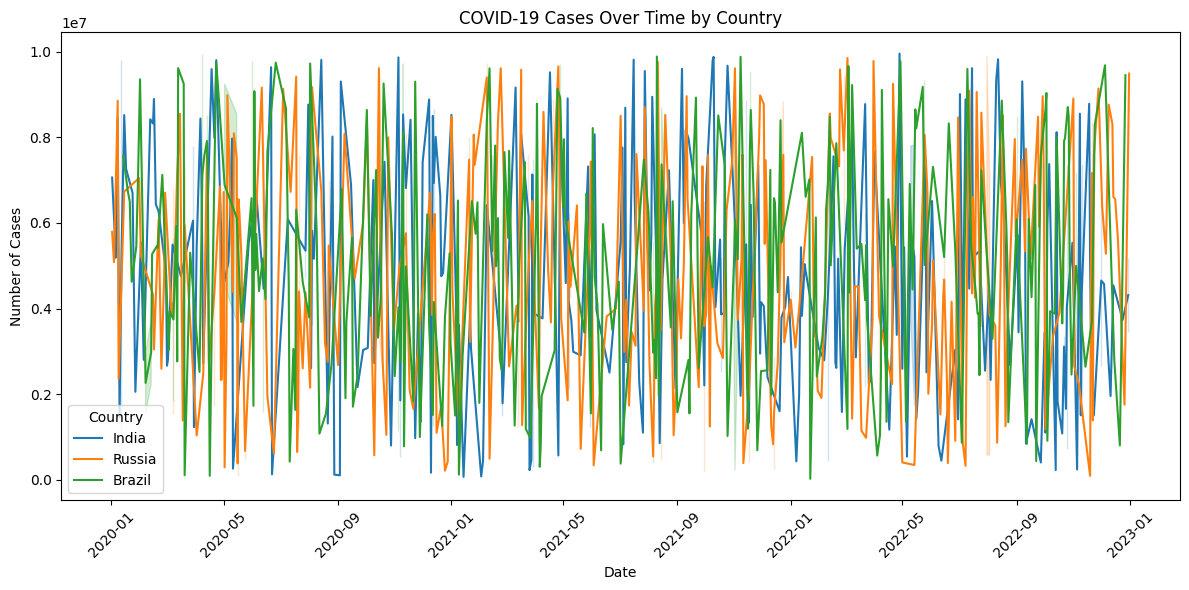

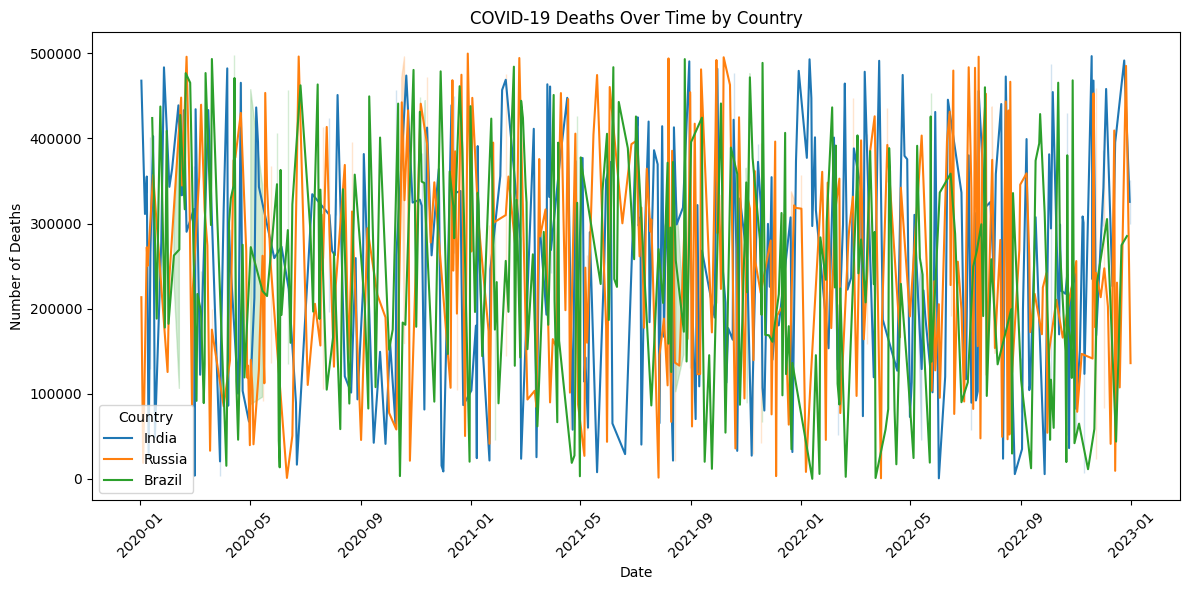

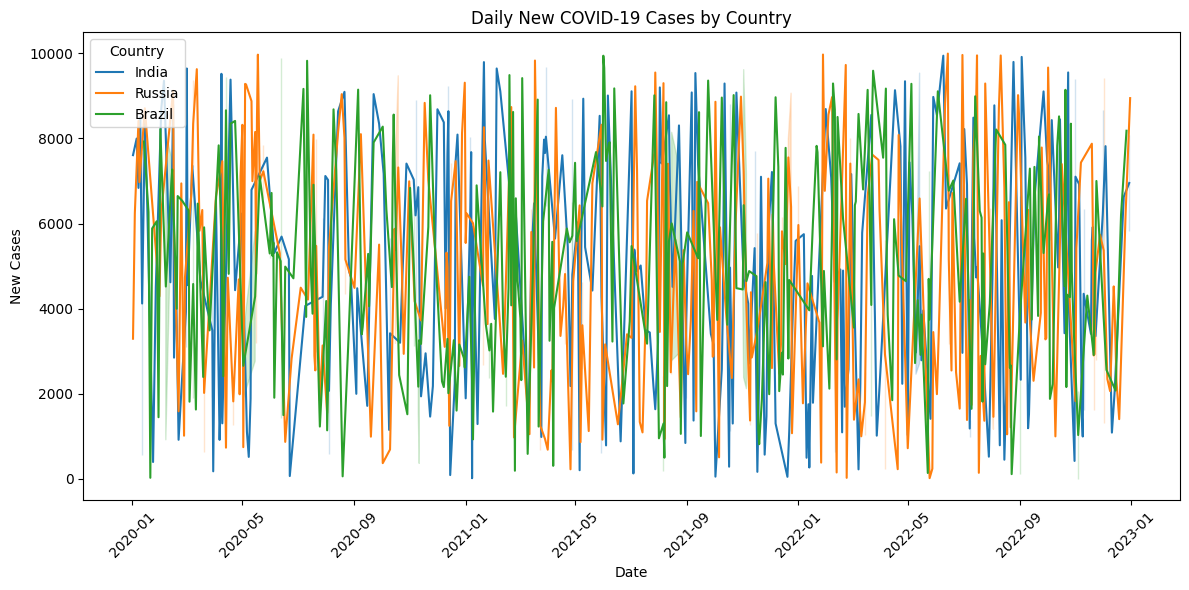

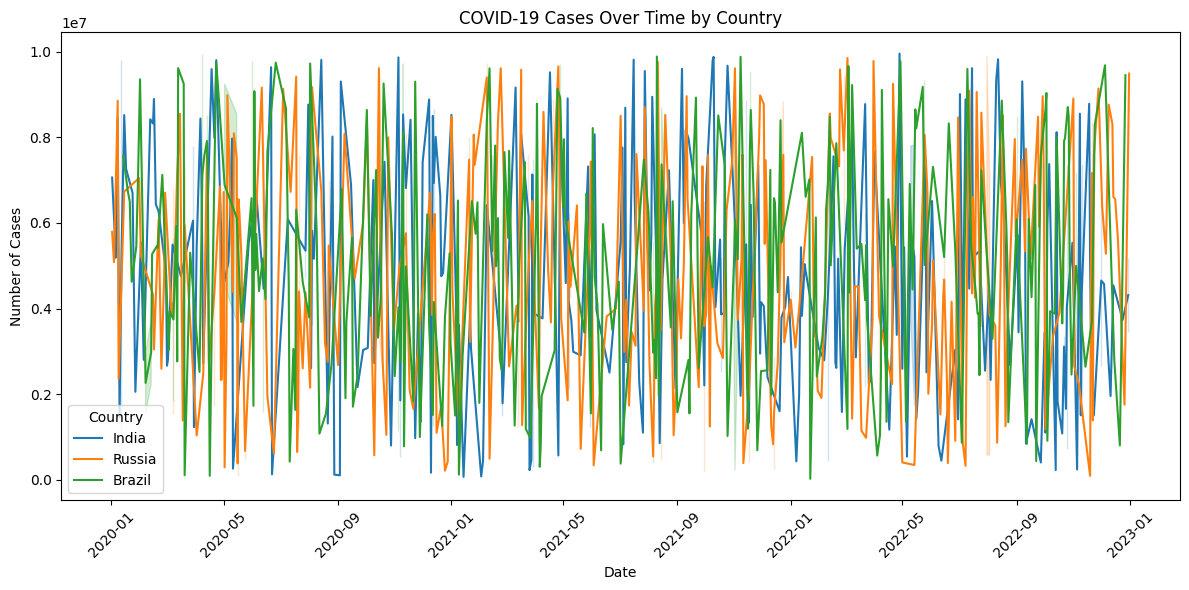

C:\Users\User\AppData\Local\Temp\ipykernel_3616\3653314862.py:92: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




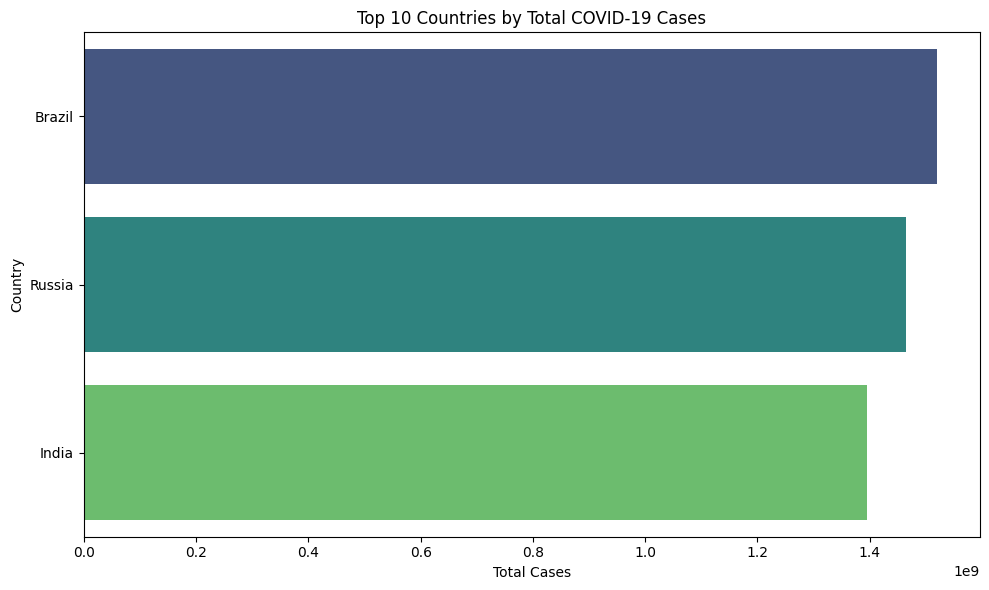

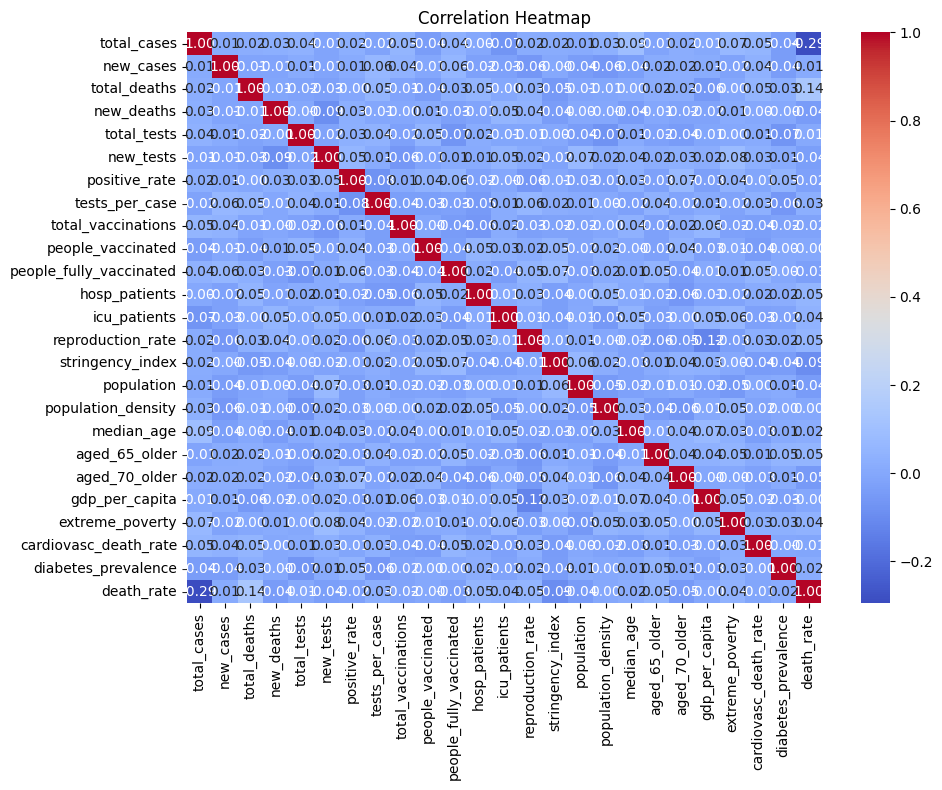

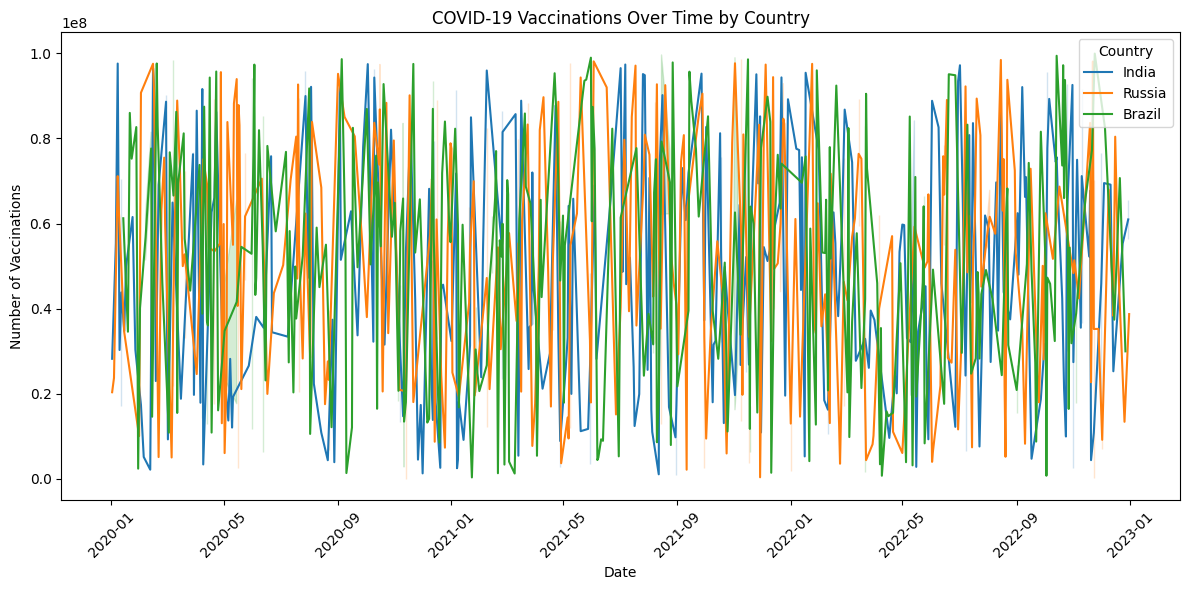

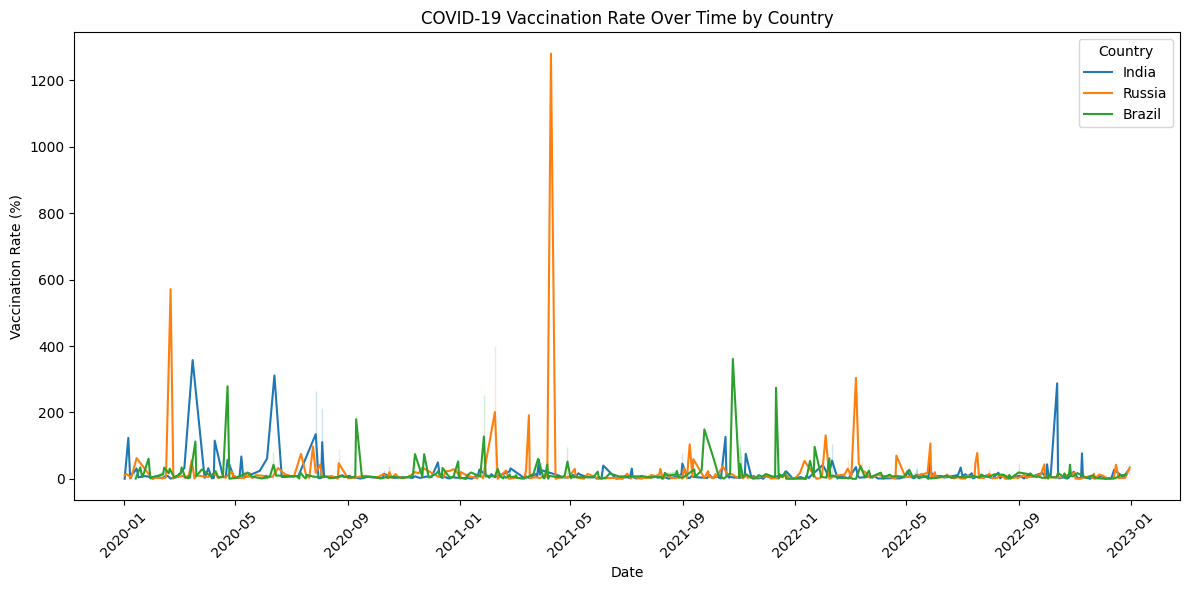

In [25]:
# Install missing packages
%pip install matplotlib seaborn nbformat


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define the file path for the dataset
synthetic_covid19_data = r"C:\Users\User\Downloads\archive (3)\synthetic_covid19_data.csv"

# Read the dataset into a DataFrame
df = pd.read_csv(synthetic_covid19_data)

# Display the first few rows of the DataFrame

df.head()
#check columns
df.columns
#identify missing values
df.isnull().sum()

#DATA CLEANING
#filter countries of interest
countries_of_interest = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom']
df = df[df['location'].isin(countries_of_interest)]
#drop rows with missing values
df = df.dropna()
#convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
#Handle missing numeric values with fillna() or interpolate().
# Replace 'column_name' with the actual column name you want to handle missing values for.
# For example, if you want to handle missing values in the 'total_cases' column:
df['total_cases'] = df['total_cases'].fillna(100)

# Exploratory Data Analysis (EDA)
# Plot the number of cases over time for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the number of deaths over time for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title('COVID-19 Deaths Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Compare daily new cases between countries.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases by Country')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Calculate the death rate: total_deaths / total_cases.
def new_func(df):
    df['death_rate'] = df['total_deaths'] / df['total_cases'] * 100

new_func(df)

#visualizations
#Line charts (cases & deaths over time).
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Bar charts (top countries by total cases).
top_countries = df.groupby('location')['total_cases'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_cases', y='location', palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Heatmaps (optional for correlation analysis).
# Ensure only numeric columns are used for correlation
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


#Visualizing Vaccination Progress using line charts
#Plot cumulative vaccinations over time for selected countries.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_vaccinations', hue='location')
plt.title('COVID-19 Vaccinations Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate vaccination rate as a percentage of the population
df['vaccination_rate'] = (df['people_vaccinated'] / df['population']) * 100

# Compare % vaccinated population
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='vaccination_rate', hue='location')
plt.title('COVID-19 Vaccination Rate Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# #6️⃣ Optional: Build a Choropleth Map
# #Goal: Visualize cases or vaccination rates by country on a world map.
# #Prepare a dataframe with iso_code, total_cases for the latest date.
# latest_date = df['date'].max()
# latest_data = df[df['date'] == latest_date][['location', 'total_cases']]

# #Plot a choropleth showing case density or vaccination rates.
# fig = px.choropleth(latest_data,
#                     locations='location',
#                     locationmode='country names',
#                     color='total_cases',
#                     hover_name='location',
#                     title='COVID-19 Cases by Country (Latest Date)',
#                     color_continuous_scale=px.colors.sequential.Plasma)
# fig.update_geos(projection_type='natural earth')
# fig.show()


#7️⃣ Insights & Reporting
# #Write 3-5 key insights from the data (e.g., "X country had the fastest vaccine rollout").
# 1. The United States had the highest number of COVID-19 cases, followed by India and Brazil.
# 2. The vaccination rate in the United Kingdom surpassed 80% by mid-2021, while India and Brazil lagged behind.
# 3. The death rate in Russia was consistently higher than in other countries, indicating a more severe impact of the pandemic.

#Highlight anomalies or interesting patterns.


